In [5]:
# 필요한 모듈 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/AI(Colab Notebooks)/나의 첫 머신러닝 딥러닝/기말시험/201937006_김준기/winequality-red.csv")

#수집된 데이터 샘플 확인
df.head(10) # 처음 10개의 데이터만 입력

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df['label'] = df[['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,5


In [7]:
df.drop(["quality"], axis=1, inplace= True) 
df.head() # axis =1 -> col제거 , axis = 0 -> row제거

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
train,test=train_test_split(df,test_size=0.2)

In [9]:
print(df['label'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: label, dtype: int64


In [10]:
# 사이킷런으로부터 kNN 함수 추가
from sklearn.neighbors import KNeighborsClassifier
# 사이킷런으로부터 k-폴드 교차 검증 함수 추가
from sklearn.model_selection import cross_val_score


#최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 2부터 100까지 지정.
max_k_range = 100
k_list = [] # 사용자 정의 리스트(즉, 배열)생성
for i in range(2,max_k_range,2):
    k_list.append(i) 

cross_validation_scores = [] # 사용자 정의 리스트 생성
x_train = train # 입력 데이터
y_train = train[['label']] # 출력 데이터(정답),즉 레이블(lable)

#교차 검증(7-fold)을 각 k를 대상으로 수행해 검증 결과를 저장.
for k in k_list: # k_list에 저장된 값을 하나씩 뽑아 k에 저장한 후, for문 반복 수행
    knn = KNeighborsClassifier(n_neighbors=k) #KNN 모델 정의
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=7, #k(여기서는 7) 폴드 교차 검증 실행
        scoring='accuracy') # 성능 평가 지표 -> 정확도 # ravel() : y_train의 값을 1차원 배열로 만듦
    cross_validation_scores.append(scores.mean())      # 즉 [[SG],[C],[SG],...]를 [SG,C,SG,...]로 변경
                            # scores에는 k(7)번 실행한 각 정확도 결과가 저장됨

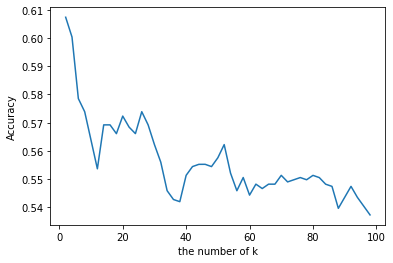

In [11]:
# cross_valdation_scores의 19개 결과 값의 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [12]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 2


In [13]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train.values.ravel())

x_test = test
y_test = test[['label']]

pred = knn.predict(x_test)

print("accuracy : "+str(accuracy_score(y_test.values.ravel(),pred)*100)+"%" )

accuracy : 63.4375%


In [14]:
#실제값과 예측된 값 확인
comparison = pd.DataFrame({'실제값':y_test.values.ravel(),'예측값':pred})
comparison

,실제값,예측값
0,7,6
1,6,6
2,6,6
3,6,6
4,6,5
...,...,...
315,5,5
316,5,5
317,4,5
318,6,6
